In [1]:
#importing the necessary packages needed
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r'C:\Users\OBAFEMI OLUWADOLAPO\Documents\Py\candy_production.csv')
print(df)

    observation_date  IPG3113N
0         1972-01-01   85.6945
1         1972-02-01   71.8200
2         1972-03-01   66.0229
3         1972-04-01   64.5645
4         1972-05-01   65.0100
..               ...       ...
543       2017-04-01  107.4288
544       2017-05-01  101.9209
545       2017-06-01  104.2022
546       2017-07-01  102.5861
547       2017-08-01  114.0613

[548 rows x 2 columns]


In [4]:
#Let’s make a copy of data so that even if we do changes in these dataset we do not lose the original dataset.
candy=df.copy()

In [5]:
#Dataset Structure and Content
candy.columns

Index(['observation_date', 'IPG3113N'], dtype='object')

# Data Types of Each Feature

In [6]:
candy.dtypes

observation_date     object
IPG3113N            float64
dtype: object

In [7]:
candy.shape

(548, 2)

In [8]:
candy.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [9]:
candy.tail()

,observation_date,IPG3113N
543,2017-04-01,107.4288
544,2017-05-01,101.9209
545,2017-06-01,104.2022
546,2017-07-01,102.5861
547,2017-08-01,114.0613


# For Feature Extraction

In [10]:
df['observation_date'] = pd.to_datetime(df.observation_date,format='%Y-%m-%d')  
candy['observation_date'] = pd.to_datetime(candy.observation_date,format='%Y-%m-%d')

In [11]:
#  let’s extract the year, month and day from the observation_date
for i in (df,candy):
    i['year']=i.observation_date.dt.year 
    i['month']=i.observation_date.dt.month 
    i['day']=i.observation_date.dt.day

In [12]:
df.head()

,observation_date,IPG3113N,year,month,day
0,1972-01-01,85.6945,1972,1,1
1,1972-02-01,71.8200,1972,2,1
2,1972-03-01,66.0229,1972,3,1
3,1972-04-01,64.5645,1972,4,1
4,1972-05-01,65.0100,1972,5,1


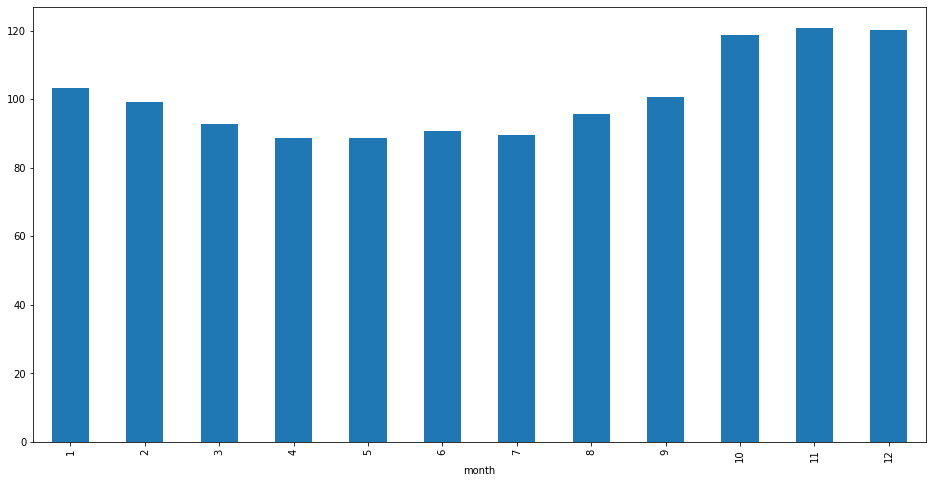

In [13]:
# let’s look at monthly production count.
plt.figure(figsize=(16,8))
df.groupby('month')['IPG3113N'].mean().plot.bar()

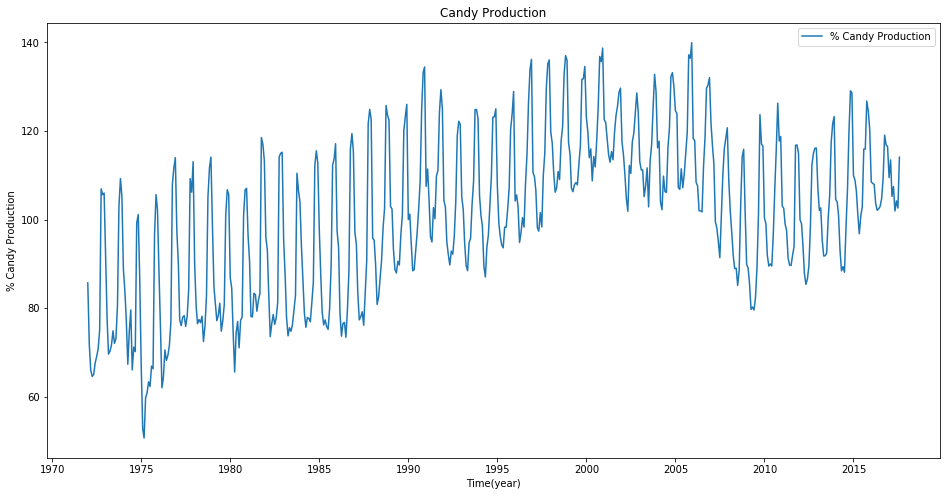

In [14]:
# EDA - Plots
df.index = df['observation_date'] # indexing the Datetime to get the time period on the x-axis.
st = df['IPG3113N']
plt.figure(figsize=(16,8))
plt.plot(st, label='% Candy Production')
plt.title('Candy Production')
plt.xlabel("Time(year)")
plt.ylabel("% Candy Production")
plt.legend(loc='best')

# Splitting the Data into Training And Validation Part

In [15]:
candy_train=df.loc[:'2011-10-01']
candy_test=df.loc['2011-11-01':]

In [16]:
candy_train.head()

,observation_date,IPG3113N,year,month,day
observation_date,,,,,
1972-01-01,1972-01-01,85.6945,1972,1,1
1972-02-01,1972-02-01,71.8200,1972,2,1
1972-03-01,1972-03-01,66.0229,1972,3,1
1972-04-01,1972-04-01,64.5645,1972,4,1
1972-05-01,1972-05-01,65.0100,1972,5,1


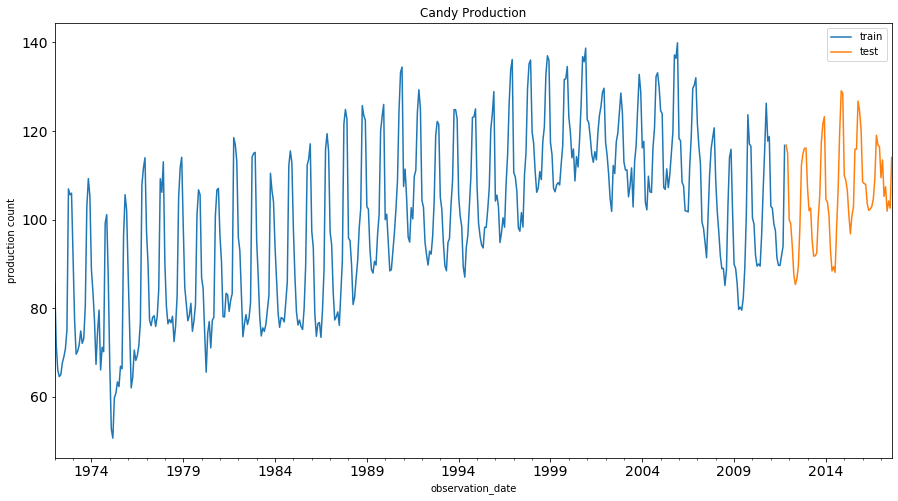

In [17]:
candy_train.IPG3113N.plot(figsize=(15,8), title= 'Candy Production', fontsize=14, label='train')
candy_test.IPG3113N.plot(figsize=(15,8), title= 'Candy Production', fontsize=14, label='test')
plt.xlabel("observation_date")
plt.ylabel("production count")
plt.legend(loc='best')
plt.show()

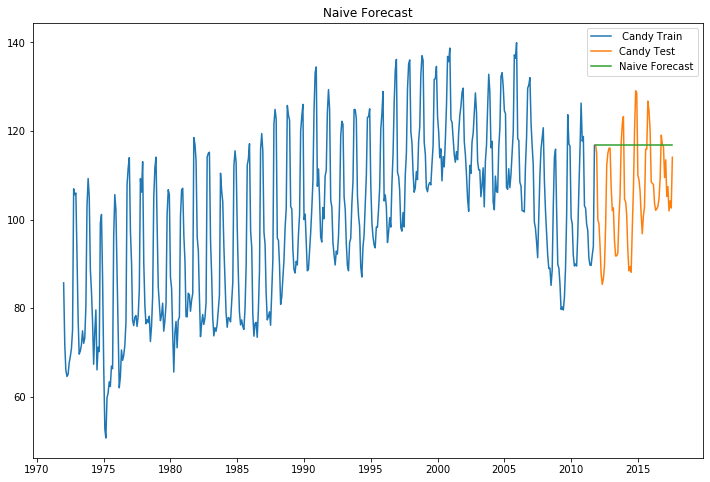

In [18]:
# predictions using naive approach for the validation set.
data = np.asarray(candy_train['IPG3113N'])
y_hat = candy_test.copy()
y_hat['Naive'] = data[len(data)-1]
plt.figure(figsize=(12,8))
plt.plot(candy_train.index, candy_train['IPG3113N'], label=' Candy Train')
plt.plot(candy_test.index, candy_test['IPG3113N'], label='Candy Test')
plt.plot(y_hat.index,y_hat['Naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import random
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn.metrics import mean_absolute_error

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
#read the csv file
data = pd.read_csv("../input/us-candy-production-by-month/candy_production.csv")
t =  data.iloc[: , [ 1]] 
#define the input sequence
raw_seq = t.values
raw_seq_train = raw_seq[:428]

# choose a number of time steps
n_steps_in, n_steps_out = 12, 12
# split into samples
X, y = split_sequence(raw_seq_train, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
y = y.reshape((y.shape[0], y.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(100, activation='relu',return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=0)
# demonstrate prediction
raw_seq_test = raw_seq[428:]
x = raw_seq_test.reshape((10 , 12 , raw_seq.shape[1] ))
r = random.randint(0 , 8)
x_input = x[r]

x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

#Calculating the Mean Absolute Error(MAE) and Mean Percentage Error(MPE)
expected = x[r + 1]
predictions = yhat.reshape((12,1))
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)

def mean_absolute_percentage_error(expected, predictions): 
    y_true, y_pred = np.array(expected), np.array(predictions)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(expected, predictions)
print('MAPE: %f' % mape)

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`